In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
hhpub_file_path = 'C:/AdvayRepos/gm_project/data/hhpub.csv'
vehpub_file_path = 'C:/AdvayRepos/gm_project/data/vehpub.csv'
perpub_file_path = 'C:/AdvayRepos/gm_project/data/perpub.csv'

household_data = pd.read_csv(hhpub_file_path)
vehicle_data = pd.read_csv(vehpub_file_path)
personal_data = pd.read_csv(perpub_file_path)

In [40]:
df = pd.merge(vehicle_data, household_data, on='HOUSEID', how='inner')

# Identify duplicate columns
duplicates = [col for col in df.columns if col.endswith(('_x'))]

# Drop the duplicate columns
df = df.drop(columns=duplicates)

# Rename columns with '_y' suffix by removing the suffix
df = df.rename(columns={col: col.replace('_y', '') for col in df.columns})


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HOUSEID           14684 non-null  int64  
 1   VEHID             14684 non-null  int64  
 2   VEHYEAR           14684 non-null  int64  
 3   MAKE              14684 non-null  int64  
 4   VEHTYPE           14684 non-null  int64  
 5   VEHFUEL           14684 non-null  int64  
 6   VEHCOMMERCIAL     14684 non-null  int64  
 7   VEHCOM_RS         14684 non-null  int64  
 8   VEHCOM_DEL        14684 non-null  int64  
 9   VEHCOM_OTH        14684 non-null  int64  
 10  COMMERCIALFREQ    14684 non-null  int64  
 11  HHVEHUSETIME_RS   14684 non-null  int64  
 12  HHVEHUSETIME_DEL  14684 non-null  int64  
 13  HHVEHUSETIME_OTH  14684 non-null  int64  
 14  VEHOWNED          14684 non-null  int64  
 15  WHOMAIN           14684 non-null  int64  
 16  VEHCASEID         14684 non-null  int64 

In [41]:
df.info()
df["MAKE"].isna()
df["MAKE"].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HOUSEID           14684 non-null  int64  
 1   VEHID             14684 non-null  int64  
 2   VEHYEAR           14684 non-null  int64  
 3   MAKE              14684 non-null  int64  
 4   VEHTYPE           14684 non-null  int64  
 5   VEHFUEL           14684 non-null  int64  
 6   VEHCOMMERCIAL     14684 non-null  int64  
 7   VEHCOM_RS         14684 non-null  int64  
 8   VEHCOM_DEL        14684 non-null  int64  
 9   VEHCOM_OTH        14684 non-null  int64  
 10  COMMERCIALFREQ    14684 non-null  int64  
 11  HHVEHUSETIME_RS   14684 non-null  int64  
 12  HHVEHUSETIME_DEL  14684 non-null  int64  
 13  HHVEHUSETIME_OTH  14684 non-null  int64  
 14  VEHOWNED          14684 non-null  int64  
 15  WHOMAIN           14684 non-null  int64  
 16  VEHCASEID         14684 non-null  int64 

0

In [42]:
df['HAS_HYBRID'] = df.groupby('HOUSEID')['HYBRID'].transform(lambda x: 1 if (x == 1).any() else 0)
df

,HOUSEID,VEHID,VEHYEAR,MAKE,VEHTYPE,VEHFUEL,VEHCOMMERCIAL,VEHCOM_RS,VEHCOM_DEL,VEHCOM_OTH,...,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID,HAS_HYBRID
0,9000013002,1,2015,48,3,1,2,-1,-1,-1,...,4,1,2,0,4,1,202202,1,1021,0
1,9000013002,2,2019,48,3,1,2,-1,-1,-1,...,4,1,2,0,4,1,202202,1,1021,0
2,9000013016,1,2011,49,1,1,2,-1,-1,-1,...,2,1,0,0,2,1,202202,2,1021,0
3,9000013039,1,2015,35,1,1,2,-1,-1,-1,...,4,1,2,0,4,1,202201,1,1021,0
4,9000013041,1,2014,34,1,1,2,-1,-1,-1,...,3,1,0,0,1,1,202201,1,1021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14679,9000218013,1,2018,30,3,1,2,-1,-1,-1,...,1,1,0,0,2,1,202301,0,1031,0
14680,9000218021,1,2016,12,3,1,1,2,2,1,...,6,2,0,0,1,2,202212,0,1032,0
14681,9000218034,1,2018,37,3,1,2,-1,-1,-1,...,6,2,0,0,2,2,202212,0,1032,0
14682,9000218034,2,2003,49,4,1,2,-1,-1,-1,...,6,2,0,0,2,2,202212,0,1032,0


In [43]:
grouped_df = df.groupby('HOUSEID').first().reset_index()
grouped_df

,HOUSEID,VEHID,VEHYEAR,MAKE,VEHTYPE,VEHFUEL,VEHCOMMERCIAL,VEHCOM_RS,VEHCOM_DEL,VEHCOM_OTH,...,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID,HAS_HYBRID
0,9000013002,1,2015,48,3,1,2,-1,-1,-1,...,4,1,2,0,4,1,202202,1,1021,0
1,9000013016,1,2011,49,1,1,2,-1,-1,-1,...,2,1,0,0,2,1,202202,2,1021,0
2,9000013039,1,2015,35,1,1,2,-1,-1,-1,...,4,1,2,0,4,1,202201,1,1021,0
3,9000013041,1,2014,34,1,1,2,-1,-1,-1,...,3,1,0,0,1,1,202201,1,1021,0
4,9000013042,1,2017,0,3,1,2,-1,-1,-1,...,4,1,0,1,2,1,202202,2,1021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7412,9000218006,1,2017,48,1,1,1,2,2,1,...,3,1,2,0,3,1,202212,1,1031,0
7413,9000218013,1,2018,30,3,1,2,-1,-1,-1,...,1,1,0,0,2,1,202301,0,1031,0
7414,9000218021,1,2016,12,3,1,1,2,2,1,...,6,2,0,0,1,2,202212,0,1032,0
7415,9000218034,1,2018,37,3,1,2,-1,-1,-1,...,6,2,0,0,2,2,202212,0,1032,0


In [44]:
grouped_df['URBRUR'] = grouped_df['URBRUR'].apply(lambda x: 1 if x == 1 else 0)


In [45]:
grouped_df = grouped_df[["HAS_HYBRID", "URBRUR", "HHFAMINC", "HHSIZE", "HHVEHCNT", "URBANSIZE"]]
grouped_df

,HAS_HYBRID,URBRUR,HHFAMINC,HHSIZE,HHVEHCNT,URBANSIZE
0,0,1,11,4,2,4
1,0,1,7,2,1,2
2,0,1,7,4,1,4
3,0,1,11,1,1,3
4,0,1,11,3,2,4
...,...,...,...,...,...,...
7412,0,1,6,3,2,3
7413,0,1,3,2,1,1
7414,0,0,4,1,1,6
7415,0,0,4,2,2,6


In [50]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

X = grouped_df.drop("HAS_HYBRID", axis=1)
y = grouped_df["HAS_HYBRID"]

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, train_size=0.75, random_state=42)

# Optionally, you can scale your features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# YOUR CODE HERE: define the model given in the diagram
model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\AdvayAdmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid),
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8652 - loss: 0.4363 - val_accuracy: 0.9153 - val_loss: 0.2894
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.3172 - val_accuracy: 0.9153 - val_loss: 0.2830
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.3217 - val_accuracy: 0.9153 - val_loss: 0.2794
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9142 - loss: 0.3148 - val_accuracy: 0.9153 - val_loss: 0.2771
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.2898 - val_accuracy: 0.9153 - val_loss: 0.2771
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.3097 - val_accuracy: 0.9153 - val_loss: 0.2754
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9115 - loss: 0.3059 - val_accuracy: 0.9153 - val_loss: 0.2758
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9122 - loss: 0.3011 - val_accuracy: 0.

Test accuracy: 0.9057


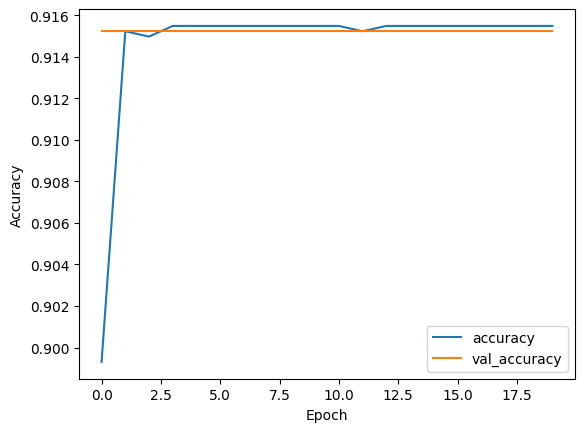

In [53]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')

# Optionally, you can plot training history to visualize model performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()